In [1]:
from cv2 import cv2 as cv2
from PIL import Image
import imagehash
from moviepy.editor import VideoFileClip

In [2]:
def isSimilar(img1, img2):
    # OpenCV图片转换为PIL image
    img1 = Image.fromarray(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    img2 = Image.fromarray(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    # 通过imagehash获取两个图片的平均hash值
    n0 = imagehash.average_hash(img1)
    n1 = imagehash.average_hash(img2)

    # hash值最小相差多少则判断为不相似，可以根据需要自定义
    cutoff = 7

    print(f'目标帧hash平均值：{n0}')
    print(f'后帧hash平均值：  {n1}')
    print(f'hash差值：       {n0 - n1}')

    flag = True
    if n0 - n1 < cutoff:
        print('相似')
    else:
        flag = False
        print('不相似')

    return flag

In [3]:
def sliceVideo(clip, fps):
    im0 = ""  # 目标帧
    start_time = 0  # 片段开始时间
    end_time = 0  # 片段结束时间
    success_durations = []  # 成功片段时间列表
    skip_durations = []  # 排除片段时间列表
    for i, img in enumerate(clip.iter_frames(fps)):
        if i == 0: im0 = img
        time = (i) / fps
        print(f'\n第{time}秒')
        result = isSimilar(im0, img)
        if not result:  # 结果为不相似
            end_time = (i - 1) / fps
            print(start_time, end_time)
            if start_time == end_time:  # 排除情况，开始时间和结束时间相同的话moviepy会报错；也可以根据需要筛选时长大于多少的片段
                skip_durations.append([start_time, end_time])
            else:
                # clip.subclip(start_time, end_time).write_videofile(f"SUBCLIP-{i}.mp4")
                success_durations.append([start_time, end_time])
            start_time = time
        im0 = img
    # 前面的循环并没有包括视频中最后一段画面，因此需要在最后加上
    end_time = clip.duration
    if start_time == end_time:  # 排除情况
        skip_durations.append([start_time, end_time])
    else:
        # clip.subclip(start_time, end_time).write_videofile(f"SUBCLIP-{i}.mp4")
        success_durations.append([start_time, end_time])

    return success_durations, skip_durations

In [4]:
if __name__ == "__main__":
    clip = VideoFileClip("videosrc/demo.mp4")
    success, skip = sliceVideo(clip, clip.fps)
    print(f"成功片段：\n{success}\n\n排除片段：\n{skip}\n")


第0.0秒
目标帧hash平均值：80e0e0b0f8f8f8f8
后帧hash平均值：  80e0e0b0f8f8f8f8
hash差值：       0
相似

第0.04秒
目标帧hash平均值：80e0e0b0f8f8f8f8
后帧hash平均值：  80e0e0b0f8f8f8e8
hash差值：       1
相似

第0.08秒
目标帧hash平均值：80e0e0b0f8f8f8e8
后帧hash平均值：  80e0e0b0f8f8f8e8
hash差值：       0
相似

第0.12秒
目标帧hash平均值：80e0e0b0f8f8f8e8
后帧hash平均值：  80e0e0b0f8f8f8f8
hash差值：       1
相似

第0.16秒
目标帧hash平均值：80e0e0b0f8f8f8f8
后帧hash平均值：  80e0e0b0d8f8f8f8
hash差值：       1
相似

第0.2秒
目标帧hash平均值：80e0e0b0d8f8f8f8
后帧hash平均值：  80e0e0b0d8f8f8f8
hash差值：       0
相似

第0.24秒
目标帧hash平均值：80e0e0b0d8f8f8f8
后帧hash平均值：  80e0e0b0d8f8f8f8
hash差值：       0
相似

第0.28秒
目标帧hash平均值：80e0e0b0d8f8f8f8
后帧hash平均值：  80e0e0b0d878f8f8
hash差值：       1
相似

第0.32秒
目标帧hash平均值：80e0e0b0d878f8f8
后帧hash平均值：  80a0a0b0d878f8f8
hash差值：       2
相似

第0.36秒
目标帧hash平均值：80a0a0b0d878f8f8
后帧hash平均值：  80a0b0b0f878f8e8
hash差值：       3
相似

第0.4秒
目标帧hash平均值：80a0b0b0f878f8e8
后帧hash平均值：  80a0b0b0f878f8e8
hash差值：       0
相似

第0.44秒
目标帧hash平均值：80a0b0b0f878f8e8
后帧hash平均值：  80a0b0b0f878f8f8
hash差值：       

第4.0秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.04秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.08秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.12秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.16秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.2秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.24秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.28秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.32秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       0
相似

第4.36秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d8d8187868f8f9
hash差值：       1
相似

第4.4秒
目标帧hash平均值：c0d8d8187868f8f9
后帧hash平均值：  c0d858187868f8f9
hash差值：       1
相似

第4.44秒
目标帧hash平均值：c0d858187868f8f9
后帧hash平均值：  c0d8d818f868f8f9
hash差值：       2

目标帧hash平均值：8090b070f8f838db
后帧hash平均值：  8090b070f8f838db
hash差值：       0
相似

第8.16秒
目标帧hash平均值：8090b070f8f838db
后帧hash平均值：  8090b070f8f838db
hash差值：       0
相似

第8.2秒
目标帧hash平均值：8090b070f8f838db
后帧hash平均值：  c090b07078f8b8db
hash差值：       3
相似

第8.24秒
目标帧hash平均值：c090b07078f8b8db
后帧hash平均值：  c0d0b07078f8b8db
hash差值：       1
相似

第8.28秒
目标帧hash平均值：c0d0b07078f8b8db
后帧hash平均值：  c0d0b07078f8b8db
hash差值：       0
相似

第8.32秒
目标帧hash平均值：c0d0b07078f8b8db
后帧hash平均值：  c0d0b07078f8f8fb
hash差值：       2
相似

第8.36秒
目标帧hash平均值：c0d0b07078f8f8fb
后帧hash平均值：  c0d0b07078f8b8fb
hash差值：       1
相似

第8.4秒
目标帧hash平均值：c0d0b07078f8b8fb
后帧hash平均值：  c0d0b07078f8b8fb
hash差值：       0
相似

第8.44秒
目标帧hash平均值：c0d0b07078f8b8fb
后帧hash平均值：  c0f0b07078f8b8fb
hash差值：       1
相似

第8.48秒
目标帧hash平均值：c0f0b07078f8b8fb
后帧hash平均值：  c0f0b07078f8b8fb
hash差值：       0
相似

第8.52秒
目标帧hash平均值：c0f0b07078f8b8fb
后帧hash平均值：  c0f0b07078f8f87b
hash差值：       2
相似

第8.56秒
目标帧hash平均值：c0f0b07078f8f87b
后帧hash平均值：  c0f0b07078f8f87b
hash差值：       0
相似

第

目标帧hash平均值：405858387c6cfcbd
后帧hash平均值：  405858387c6cfcbd
hash差值：       0
相似

第12.24秒
目标帧hash平均值：405858387c6cfcbd
后帧hash平均值：  405858383c6cfcbd
hash差值：       1
相似

第12.28秒
目标帧hash平均值：405858383c6cfcbd
后帧hash平均值：  405858383c6cecbd
hash差值：       1
相似

第12.32秒
目标帧hash平均值：405858383c6cecbd
后帧hash平均值：  405858383c6cecbd
hash差值：       0
相似

第12.36秒
目标帧hash平均值：405858383c6cecbd
后帧hash平均值：  405858387c6cfcbd
hash差值：       2
相似

第12.4秒
目标帧hash平均值：405858387c6cfcbd
后帧hash平均值：  405858387c6cfcfd
hash差值：       1
相似

第12.44秒
目标帧hash平均值：405858387c6cfcfd
后帧hash平均值：  405858387c6cfcfd
hash差值：       0
相似

第12.48秒
目标帧hash平均值：405858387c6cfcfd
后帧hash平均值：  405858387c6cfcfd
hash差值：       0
相似

第12.52秒
目标帧hash平均值：405858387c6cfcfd
后帧hash平均值：  405858387c6cfcfd
hash差值：       0
相似

第12.56秒
目标帧hash平均值：405858387c6cfcfd
后帧hash平均值：  405858387c6cfcfd
hash差值：       0
相似

第12.6秒
目标帧hash平均值：405858387c6cfcfd
后帧hash平均值：  405858383c6c6cfd
hash差值：       3
相似

第12.64秒
目标帧hash平均值：405858383c6c6cfd
后帧hash平均值：  405858387c6cecfd
hash差值：   


第16.2秒
目标帧hash平均值：405018b8fc2c6f6b
后帧hash平均值：  405058b8fc2c6f6b
hash差值：       1
相似

第16.24秒
目标帧hash平均值：405058b8fc2c6f6b
后帧hash平均值：  405858b8fc2c6f6b
hash差值：       1
相似

第16.28秒
目标帧hash平均值：405858b8fc2c6f6b
后帧hash平均值：  405858b8fc2c6f6b
hash差值：       0
相似

第16.32秒
目标帧hash平均值：405858b8fc2c6f6b
后帧hash平均值：  405858b8fc2c6f6b
hash差值：       0
相似

第16.36秒
目标帧hash平均值：405858b8fc2c6f6b
后帧hash平均值：  405858b8fc2c6f6b
hash差值：       0
相似

第16.4秒
目标帧hash平均值：405858b8fc2c6f6b
后帧hash平均值：  40585838fc6c6f6b
hash差值：       2
相似

第16.44秒
目标帧hash平均值：40585838fc6c6f6b
后帧hash平均值：  40585838fcec6f6f
hash差值：       2
相似

第16.48秒
目标帧hash平均值：40585838fcec6f6f
后帧hash平均值：  40585838fcec2f6f
hash差值：       1
相似

第16.52秒
目标帧hash平均值：40585838fcec2f6f
后帧hash平均值：  40585838fce42f6f
hash差值：       1
相似

第16.56秒
目标帧hash平均值：40585838fce42f6f
后帧hash平均值：  40585838fce42f6f
hash差值：       0
相似

第16.6秒
目标帧hash平均值：40585838fce42f6f
后帧hash平均值：  405858387ce42f6f
hash差值：       1
相似

第16.64秒
目标帧hash平均值：405858387ce42f6f
后帧hash平均值：  405858187ce42f6f
ha

目标帧hash平均值：202424241e9bb3fa
后帧hash平均值：  202424243e9bb3fb
hash差值：       2
相似

第20.48秒
目标帧hash平均值：202424243e9bb3fb
后帧hash平均值：  202424241e9bb3fb
hash差值：       1
相似

第20.52秒
目标帧hash平均值：202424241e9bb3fb
后帧hash平均值：  202424243e9bb3fb
hash差值：       1
相似

第20.56秒
目标帧hash平均值：202424243e9bb3fb
后帧hash平均值：  206424243e9bb3fb
hash差值：       1
相似

第20.6秒
目标帧hash平均值：206424243e9bb3fb
后帧hash平均值：  202424241e9bb3fb
hash差值：       2
相似

第20.64秒
目标帧hash平均值：202424241e9bb3fb
后帧hash平均值：  202424241e9bb3fb
hash差值：       0
相似

第20.68秒
目标帧hash平均值：202424241e9bb3fb
后帧hash平均值：  206424641e9ab3fb
hash差值：       3
相似

第20.72秒
目标帧hash平均值：206424641e9ab3fb
后帧hash平均值：  202424041e9ab3fb
hash差值：       3
相似

第20.76秒
目标帧hash平均值：202424041e9ab3fb
后帧hash平均值：  206424641e9ab3fb
hash差值：       3
相似

第20.8秒
目标帧hash平均值：206424641e9ab3fb
后帧hash平均值：  206424641e9ab3fb
hash差值：       0
相似

第20.84秒
目标帧hash平均值：206424641e9ab3fb
后帧hash平均值：  202424041e9ab3fb
hash差值：       3
相似

第20.88秒
目标帧hash平均值：202424041e9ab3fb
后帧hash平均值：  202424041e9ab3fb
hash差值：   

目标帧hash平均值：406031307868ebff
后帧hash平均值：  406031307868ebff
hash差值：       0
相似

第24.76秒
目标帧hash平均值：406031307868ebff
后帧hash平均值：  406031307868eb3f
hash差值：       2
相似

第24.8秒
目标帧hash平均值：406031307868eb3f
后帧hash平均值：  406031307868e93f
hash差值：       1
相似

第24.84秒
目标帧hash平均值：406031307868e93f
后帧hash平均值：  406031307868e9ff
hash差值：       2
相似

第24.88秒
目标帧hash平均值：406031307868e9ff
后帧hash平均值：  406031307868e9ff
hash差值：       0
相似

第24.92秒
目标帧hash平均值：406031307868e9ff
后帧hash平均值：  406031307868e9ff
hash差值：       0
相似

第24.96秒
目标帧hash平均值：406031307868e9ff
后帧hash平均值：  406031307868e9ff
hash差值：       0
相似

第25.0秒
目标帧hash平均值：406031307868e9ff
后帧hash平均值：  406031307868e9bf
hash差值：       1
相似

第25.04秒
目标帧hash平均值：406031307868e9bf
后帧hash平均值：  406031307868e9ff
hash差值：       1
相似

第25.08秒
目标帧hash平均值：406031307868e9ff
后帧hash平均值：  406031307868e9ff
hash差值：       0
相似

第25.12秒
目标帧hash平均值：406031307868e9ff
后帧hash平均值：  406031307868e9ff
hash差值：       0
相似

第25.16秒
目标帧hash平均值：406031307868e9ff
后帧hash平均值：  406030307868e9ff
hash差值：   

目标帧hash平均值：404848183c34e4fe
后帧hash平均值：  406848183c34f4fe
hash差值：       2
相似

第28.96秒
目标帧hash平均值：406848183c34f4fe
后帧hash平均值：  406848183c34f4fe
hash差值：       0
相似

第29.0秒
目标帧hash平均值：406848183c34f4fe
后帧hash平均值：  406848183c34f4fe
hash差值：       0
相似

第29.04秒
目标帧hash平均值：406848183c34f4fe
后帧hash平均值：  606848183c34f4fe
hash差值：       1
相似

第29.08秒
目标帧hash平均值：606848183c34f4fe
后帧hash平均值：  606848183c34f4fe
hash差值：       0
相似

第29.12秒
目标帧hash平均值：606848183c34f4fe
后帧hash平均值：  606848983c34f4fe
hash差值：       1
相似

第29.16秒
目标帧hash平均值：606848983c34f4fe
后帧hash平均值：  606848183c3474fe
hash差值：       2
相似

第29.2秒
目标帧hash平均值：606848183c3474fe
后帧hash平均值：  606848b83c3474fe
hash差值：       2
相似

第29.24秒
目标帧hash平均值：606848b83c3474fe
后帧hash平均值：  406848383c3474fe
hash差值：       2
相似

第29.28秒
目标帧hash平均值：406848383c3474fe
后帧hash平均值：  406848383c3474fe
hash差值：       0
相似

第29.32秒
目标帧hash平均值：406848383c3474fe
后帧hash平均值：  406848383c3474fe
hash差值：       0
相似

第29.36秒
目标帧hash平均值：406848383c3474fe
后帧hash平均值：  406848383c3474fe
hash差值：   

目标帧hash平均值：404848587c34f47f
后帧hash平均值：  404848587c34f47f
hash差值：       0
相似

第33.0秒
目标帧hash平均值：404848587c34f47f
后帧hash平均值：  404848587c34f47f
hash差值：       0
相似

第33.04秒
目标帧hash平均值：404848587c34f47f
后帧hash平均值：  404848587c34f47f
hash差值：       0
相似

第33.08秒
目标帧hash平均值：404848587c34f47f
后帧hash平均值：  404848587c64fc7f
hash差值：       3
相似

第33.12秒
目标帧hash平均值：404848587c64fc7f
后帧hash平均值：  404848587c64fc7f
hash差值：       0
相似

第33.16秒
目标帧hash平均值：404848587c64fc7f
后帧hash平均值：  404848587c6cfc7f
hash差值：       1
相似

第33.2秒
目标帧hash平均值：404848587c6cfc7f
后帧hash平均值：  404848587c6cfc7f
hash差值：       0
相似

第33.24秒
目标帧hash平均值：404848587c6cfc7f
后帧hash平均值：  404848587c6cfcff
hash差值：       1
相似

第33.28秒
目标帧hash平均值：404848587c6cfcff
后帧hash平均值：  404848587c6cecff
hash差值：       1
相似

第33.32秒
目标帧hash平均值：404848587c6cecff
后帧hash平均值：  404848587c6cecff
hash差值：       0
相似

第33.36秒
目标帧hash平均值：404848587c6cecff
后帧hash平均值：  404848587c6cecff
hash差值：       0
相似

第33.4秒
目标帧hash平均值：404848587c6cecff
后帧hash平均值：  404848587c6cecff
hash差值：    

目标帧hash平均值：c05058507c6cecff
后帧hash平均值：  c05058507c6cecff
hash差值：       0
相似

第36.88秒
目标帧hash平均值：c05058507c6cecff
后帧hash平均值：  c05058507c6cecff
hash差值：       0
相似

第36.92秒
目标帧hash平均值：c05058507c6cecff
后帧hash平均值：  c05058507c6cecff
hash差值：       0
相似

第36.96秒
目标帧hash平均值：c05058507c6cecff
后帧hash平均值：  c05058587c6cecff
hash差值：       1
相似

第37.0秒
目标帧hash平均值：c05058587c6cecff
后帧hash平均值：  c05058507c6cecff
hash差值：       1
相似

第37.04秒
目标帧hash平均值：c05058507c6cecff
后帧hash平均值：  c05058587c6cecff
hash差值：       1
相似

第37.08秒
目标帧hash平均值：c05058587c6cecff
后帧hash平均值：  c05058587c6cecff
hash差值：       0
相似

第37.12秒
目标帧hash平均值：c05058587c6cecff
后帧hash平均值：  c05058587c6cecff
hash差值：       0
相似

第37.16秒
目标帧hash平均值：c05058587c6cecff
后帧hash平均值：  c05058587c6cecff
hash差值：       0
相似

第37.2秒
目标帧hash平均值：c05058587c6cecff
后帧hash平均值：  c05058587c6cecff
hash差值：       0
相似

第37.24秒
目标帧hash平均值：c05058587c6cecff
后帧hash平均值：  c05058587c6cecff
hash差值：       0
相似

第37.28秒
目标帧hash平均值：c05058587c6cecff
后帧hash平均值：  c05058587c6cecff
hash差值：   

目标帧hash平均值：c05058187c6cfcff
后帧hash平均值：  c05058587c6cfcff
hash差值：       1
相似

第40.92秒
目标帧hash平均值：c05058587c6cfcff
后帧hash平均值：  c05058587c6cfcff
hash差值：       0
相似

第40.96秒
目标帧hash平均值：c05058587c6cfcff
后帧hash平均值：  c05058587c6cfcff
hash差值：       0
相似

第41.0秒
目标帧hash平均值：c05058587c6cfcff
后帧hash平均值：  c05058587c6cfcff
hash差值：       0
相似

第41.04秒
目标帧hash平均值：c05058587c6cfcff
后帧hash平均值：  c05058587c6cfcff
hash差值：       0
相似

第41.08秒
目标帧hash平均值：c05058587c6cfcff
后帧hash平均值：  c05058587c6cfcff
hash差值：       0
相似

第41.12秒
目标帧hash平均值：c05058587c6cfcff
后帧hash平均值：  c05058587c6cfcff
hash差值：       0
相似

第41.16秒
目标帧hash平均值：c05058587c6cfcff
后帧hash平均值：  c0d058587c6cecff
hash差值：       2
相似

第41.2秒
目标帧hash平均值：c0d058587c6cecff
后帧hash平均值：  c0d058587c6cecff
hash差值：       0
相似

第41.24秒
目标帧hash平均值：c0d058587c6cecff
后帧hash平均值：  c0d058587c6cecff
hash差值：       0
相似

第41.28秒
目标帧hash平均值：c0d058587c6cecff
后帧hash平均值：  c0d058587c6cecff
hash差值：       0
相似

第41.32秒
目标帧hash平均值：c0d058587c6cecff
后帧hash平均值：  c0d058587c6cecff
hash差值：   

目标帧hash平均值：c0f0f0307878f8fe
后帧hash平均值：  c0f0f0307878f8fe
hash差值：       0
相似

第45.2秒
目标帧hash平均值：c0f0f0307878f8fe
后帧hash平均值：  c0f030307878f8fe
hash差值：       2
相似

第45.24秒
目标帧hash平均值：c0f030307878f8fe
后帧hash平均值：  c0f0f0307878f8fe
hash差值：       2
相似

第45.28秒
目标帧hash平均值：c0f0f0307878f8fe
后帧hash平均值：  c0f0f0307878f8fe
hash差值：       0
相似

第45.32秒
目标帧hash平均值：c0f0f0307878f8fe
后帧hash平均值：  c0f0f0307878f8fe
hash差值：       0
相似

第45.36秒
目标帧hash平均值：c0f0f0307878f8fe
后帧hash平均值：  c0f070307878f8fe
hash差值：       1
相似

第45.4秒
目标帧hash平均值：c0f070307878f8fe
后帧hash平均值：  c0f0f0307878f8fe
hash差值：       1
相似

第45.44秒
目标帧hash平均值：c0f0f0307878f8fe
后帧hash平均值：  c0f0f0307878f8fe
hash差值：       0
相似

第45.48秒
目标帧hash平均值：c0f0f0307878f8fe
后帧hash平均值：  c0f0f0307878f8fe
hash差值：       0
相似

第45.52秒
目标帧hash平均值：c0f0f0307878f8fe
后帧hash平均值：  c0d0f0307878f8fe
hash差值：       1
相似

第45.56秒
目标帧hash平均值：c0d0f0307878f8fe
后帧hash平均值：  c0d0f0307878f8fe
hash差值：       0
相似

第45.6秒
目标帧hash平均值：c0d0f0307878f8fe
后帧hash平均值：  c0d0f0307878f8fe
hash差值：    

目标帧hash平均值：405070327868e8be
后帧hash平均值：  405070527868e8be
hash差值：       2
相似

第49.36秒
目标帧hash平均值：405070527868e8be
后帧hash平均值：  405070527868e8be
hash差值：       0
相似

第49.4秒
目标帧hash平均值：405070527868e8be
后帧hash平均值：  40507052786868be
hash差值：       1
相似

第49.44秒
目标帧hash平均值：40507052786868be
后帧hash平均值：  40507052786868fe
hash差值：       1
相似

第49.48秒
目标帧hash平均值：40507052786868fe
后帧hash平均值：  40507052786868fe
hash差值：       0
相似

第49.52秒
目标帧hash平均值：40507052786868fe
后帧hash平均值：  40505052786868fe
hash差值：       1
相似

第49.56秒
目标帧hash平均值：40505052786868fe
后帧hash平均值：  40505052786868fe
hash差值：       0
相似

第49.6秒
目标帧hash平均值：40505052786868fe
后帧hash平均值：  40505052786868fe
hash差值：       0
相似

第49.64秒
目标帧hash平均值：40505052786868fe
后帧hash平均值：  40505052786868fe
hash差值：       0
相似

第49.68秒
目标帧hash平均值：40505052786868fe
后帧hash平均值：  40505052786868fe
hash差值：       0
相似

第49.72秒
目标帧hash平均值：40505052786868fe
后帧hash平均值：  40505052786868fe
hash差值：       0
相似

第49.76秒
目标帧hash平均值：40505052786868fe
后帧hash平均值：  40505052786868fe
hash差值：   

目标帧hash平均值：00101010393c3c7c
后帧hash平均值：  00101810393c3c7c
hash差值：       1
相似

第53.44秒
目标帧hash平均值：00101810393c3c7c
后帧hash平均值：  00101810393c3c7c
hash差值：       0
相似

第53.48秒
目标帧hash平均值：00101810393c3c7c
后帧hash平均值：  00101810393c3c7c
hash差值：       0
相似

第53.52秒
目标帧hash平均值：00101810393c3c7c
后帧hash平均值：  00101810393c3c7c
hash差值：       0
相似

第53.56秒
目标帧hash平均值：00101810393c3c7c
后帧hash平均值：  00101818393c3c7c
hash差值：       1
相似

第53.6秒
目标帧hash平均值：00101818393c3c7c
后帧hash平均值：  00101818393c3e7c
hash差值：       1
相似

第53.64秒
目标帧hash平均值：00101818393c3e7c
后帧hash平均值：  00101818393d3e7c
hash差值：       1
相似

第53.68秒
目标帧hash平均值：00101818393d3e7c
后帧hash平均值：  00101818393c3e7c
hash差值：       1
相似

第53.72秒
目标帧hash平均值：00101818393c3e7c
后帧hash平均值：  00101818393d3c7c
hash差值：       2
相似

第53.76秒
目标帧hash平均值：00101818393d3c7c
后帧hash平均值：  00101818393d3c7c
hash差值：       0
相似

第53.8秒
目标帧hash平均值：00101818393d3c7c
后帧hash平均值：  00101818393d3c7c
hash差值：       0
相似

第53.84秒
目标帧hash平均值：00101818393d3c7c
后帧hash平均值：  0011181a393d3c7c
hash差值：   

目标帧hash平均值：00103010393c3c7c
后帧hash平均值：  00103010393c3c7c
hash差值：       0
相似

第57.6秒
目标帧hash平均值：00103010393c3c7c
后帧hash平均值：  00103010393c3c7c
hash差值：       0
相似

第57.64秒
目标帧hash平均值：00103010393c3c7c
后帧hash平均值：  00103010393c3c7c
hash差值：       0
相似

第57.68秒
目标帧hash平均值：00103010393c3c7c
后帧hash平均值：  00103010393c3c7c
hash差值：       0
相似

第57.72秒
目标帧hash平均值：00103010393c3c7c
后帧hash平均值：  00103010393c3c7c
hash差值：       0
相似

第57.76秒
目标帧hash平均值：00103010393c3c7c
后帧hash平均值：  00103010393c3c7c
hash差值：       0
相似

第57.8秒
目标帧hash平均值：00103010393c3c7c
后帧hash平均值：  00103011393c3c7c
hash差值：       1
相似

第57.84秒
目标帧hash平均值：00103011393c3c7c
后帧hash平均值：  00103011393c3c7c
hash差值：       0
相似

第57.88秒
目标帧hash平均值：00103011393c3c7c
后帧hash平均值：  00103011393c3c7c
hash差值：       0
相似

第57.92秒
目标帧hash平均值：00103011393c3c7c
后帧hash平均值：  00103011393c3c7c
hash差值：       0
相似

第57.96秒
目标帧hash平均值：00103011393c3c7c
后帧hash平均值：  00103011393c3c7c
hash差值：       0
相似

第58.0秒
目标帧hash平均值：00103011393c3c7c
后帧hash平均值：  00103011393c3c7c
hash差值：    

目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       0
相似

第61.92秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       0
相似

第61.96秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       0
相似

第62.0秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       0
相似

第62.04秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       0
相似

第62.08秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       0
相似

第62.12秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00003013193d3c7c
hash差值：       1
相似

第62.16秒
目标帧hash平均值：00003013193d3c7c
后帧hash平均值：  00003013193d3c7c
hash差值：       0
相似

第62.2秒
目标帧hash平均值：00003013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       1
相似

第62.24秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       0
相似

第62.28秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：       0
相似

第62.32秒
目标帧hash平均值：00103013193d3c7c
后帧hash平均值：  00103013193d3c7c
hash差值：   

相似

第66.08秒
目标帧hash平均值：00101010383c3c7d
后帧hash平均值：  00101010383c3c7d
hash差值：       0
相似

第66.12秒
目标帧hash平均值：00101010383c3c7d
后帧hash平均值：  00101010383c3c7f
hash差值：       1
相似

第66.16秒
目标帧hash平均值：00101010383c3c7f
后帧hash平均值：  00101010383c3c7f
hash差值：       0
相似

第66.2秒
目标帧hash平均值：00101010383c3c7f
后帧hash平均值：  00101010383c3c7f
hash差值：       0
相似

第66.24秒
目标帧hash平均值：00101010383c3c7f
后帧hash平均值：  00101010383c3c7f
hash差值：       0
相似

第66.28秒
目标帧hash平均值：00101010383c3c7f
后帧hash平均值：  00101010383c3c7f
hash差值：       0
相似

第66.32秒
目标帧hash平均值：00101010383c3c7f
后帧hash平均值：  00101010383c3c7f
hash差值：       0
相似

第66.36秒
目标帧hash平均值：00101010383c3c7f
后帧hash平均值：  00101010383c3c7f
hash差值：       0
相似

第66.4秒
目标帧hash平均值：00101010383c3c7f
后帧hash平均值：  00101010383c3c7d
hash差值：       1
相似

第66.44秒
目标帧hash平均值：00101010383c3c7d
后帧hash平均值：  00101010383c3c7c
hash差值：       1
相似

第66.48秒
目标帧hash平均值：00101010383c3c7c
后帧hash平均值：  00101010383c3c7c
hash差值：       0
相似

第66.52秒
目标帧hash平均值：00101010383c3c7c
后帧hash平均值：  00101010383c3c7

目标帧hash平均值：00101012383d3d7d
后帧hash平均值：  001808081e3e3e3e
hash差值：       16
不相似
52.56 70.16

第70.24秒
目标帧hash平均值：001808081e3e3e3e
后帧hash平均值：  001808081e3e3e3e
hash差值：       0
相似

第70.28秒
目标帧hash平均值：001808081e3e3e3e
后帧hash平均值：  081808081e3e3e3e
hash差值：       1
相似

第70.32秒
目标帧hash平均值：081808081e3e3e3e
后帧hash平均值：  081808081e3e3e3e
hash差值：       0
相似

第70.36秒
目标帧hash平均值：081808081e3e3e3e
后帧hash平均值：  081808081e3e3e3e
hash差值：       0
相似

第70.4秒
目标帧hash平均值：081808081e3e3e3e
后帧hash平均值：  081808081e3e3e3e
hash差值：       0
相似

第70.44秒
目标帧hash平均值：081808081e3e3e3e
后帧hash平均值：  080808081e3e3e3e
hash差值：       1
相似

第70.48秒
目标帧hash平均值：080808081e3e3e3e
后帧hash平均值：  0808080c1e3e3e3e
hash差值：       1
相似

第70.52秒
目标帧hash平均值：0808080c1e3e3e3e
后帧hash平均值：  0808080c1e3e3e3e
hash差值：       0
相似

第70.56秒
目标帧hash平均值：0808080c1e3e3e3e
后帧hash平均值：  080808081e3e3e3e
hash差值：       1
相似

第70.6秒
目标帧hash平均值：080808081e3e3e3e
后帧hash平均值：  080808081e3e3e3e
hash差值：       0
相似

第70.64秒
目标帧hash平均值：080808081e3e3e3e
后帧hash平均值：  080808081e3e3

目标帧hash平均值：80808c9c983c3cff
后帧hash平均值：  80808c9c983c3cff
hash差值：       0
相似

第74.44秒
目标帧hash平均值：80808c9c983c3cff
后帧hash平均值：  80808c9c983c3cff
hash差值：       0
相似

第74.48秒
目标帧hash平均值：80808c9c983c3cff
后帧hash平均值：  80808c9c983c3cff
hash差值：       0
相似

第74.52秒
目标帧hash平均值：80808c9c983c3cff
后帧hash平均值：  80808c9c983c3cff
hash差值：       0
相似

第74.56秒
目标帧hash平均值：80808c9c983c3cff
后帧hash平均值：  80808c9c983c3cff
hash差值：       0
相似

第74.6秒
目标帧hash平均值：80808c9c983c3cff
后帧hash平均值：  80848c9c983c3cff
hash差值：       1
相似

第74.64秒
目标帧hash平均值：80848c9c983c3cff
后帧hash平均值：  80848c9c983cbcff
hash差值：       1
相似

第74.68秒
目标帧hash平均值：80848c9c983cbcff
后帧hash平均值：  80848c9c983cbcff
hash差值：       0
相似

第74.72秒
目标帧hash平均值：80848c9c983cbcff
后帧hash平均值：  80848c9c983cbdff
hash差值：       1
相似

第74.76秒
目标帧hash平均值：80848c9c983cbdff
后帧hash平均值：  80848c9c983cbdff
hash差值：       0
相似

第74.8秒
目标帧hash平均值：80848c9c983cbdff
后帧hash平均值：  80848c98983cbcff
hash差值：       2
相似

第74.84秒
目标帧hash平均值：80848c98983cbcff
后帧hash平均值：  80848c9898bcbcff
hash差值：   

目标帧hash平均值：a0242c0c1e3cbebe
后帧hash平均值：  a0242c0c1e3cbebe
hash差值：       0
相似

第78.56秒
目标帧hash平均值：a0242c0c1e3cbebe
后帧hash平均值：  a0242c0c1e3cfebe
hash差值：       1
相似

第78.6秒
目标帧hash平均值：a0242c0c1e3cfebe
后帧hash平均值：  a024240c1e3cfebe
hash差值：       1
相似

第78.64秒
目标帧hash平均值：a024240c1e3cfebe
后帧hash平均值：  a024240c1e3cfebe
hash差值：       0
相似

第78.68秒
目标帧hash平均值：a024240c1e3cfebe
后帧hash平均值：  a024240c1e3cfebe
hash差值：       0
相似

第78.72秒
目标帧hash平均值：a024240c1e3cfebe
后帧hash平均值：  a024240c1e3cfebe
hash差值：       0
相似

第78.76秒
目标帧hash平均值：a024240c1e3cfebe
后帧hash平均值：  a024240c1c3cfebe
hash差值：       1
相似

第78.8秒
目标帧hash平均值：a024240c1c3cfebe
后帧hash平均值：  e024240c1c3cfebe
hash差值：       1
相似

第78.84秒
目标帧hash平均值：e024240c1c3cfebe
后帧hash平均值：  60242c0c1c3cfebe
hash差值：       2
相似

第78.88秒
目标帧hash平均值：60242c0c1c3cfebe
后帧hash平均值：  60242c0c1c3cfefe
hash差值：       1
相似

第78.92秒
目标帧hash平均值：60242c0c1c3cfefe
后帧hash平均值：  60242c8c1c3cfefe
hash差值：       1
相似

第78.96秒
目标帧hash平均值：60242c8c1c3cfefe
后帧hash平均值：  60242c0c1c3cfefe
hash差值：   

目标帧hash平均值：80809898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       2
相似

第82.64秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       0
相似

第82.68秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       0
相似

第82.72秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       0
相似

第82.76秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       0
相似

第82.8秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       0
相似

第82.84秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       0
相似

第82.88秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       0
相似

第82.92秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc2cbcff
hash差值：       0
相似

第82.96秒
目标帧hash平均值：80989898bc2cbcff
后帧hash平均值：  80989898bc28bcff
hash差值：       1
相似

第83.0秒
目标帧hash平均值：80989898bc28bcff
后帧hash平均值：  80989898bc28bcff
hash差值：       0
相似

第83.04秒
目标帧hash平均值：80989898bc28bcff
后帧hash平均值：  80989898bc28bcff
hash差值：   

目标帧hash平均值：808c8c8cbc3cbebe
后帧hash平均值：  808c8c8cbc3cbebe
hash差值：       0
相似

第86.72秒
目标帧hash平均值：808c8c8cbc3cbebe
后帧hash平均值：  808c8c9cbc3cbebe
hash差值：       1
相似

第86.76秒
目标帧hash平均值：808c8c9cbc3cbebe
后帧hash平均值：  808c8c9cbc3c3ebe
hash差值：       1
相似

第86.8秒
目标帧hash平均值：808c8c9cbc3c3ebe
后帧hash平均值：  808c8c9cbc3c3ebe
hash差值：       0
相似

第86.84秒
目标帧hash平均值：808c8c9cbc3c3ebe
后帧hash平均值：  80888c9cbc3c3ebe
hash差值：       1
相似

第86.88秒
目标帧hash平均值：80888c9cbc3c3ebe
后帧hash平均值：  80888c9cbc3c3ebe
hash差值：       0
相似

第86.92秒
目标帧hash平均值：80888c9cbc3c3ebe
后帧hash平均值：  80888c9cbc3c3ebe
hash差值：       0
相似

第86.96秒
目标帧hash平均值：80888c9cbc3c3ebe
后帧hash平均值：  80888c9cbc3c3ebe
hash差值：       0
相似

第87.0秒
目标帧hash平均值：80888c9cbc3c3ebe
后帧hash平均值：  80889c9cbc3c3e3e
hash差值：       2
相似

第87.04秒
目标帧hash平均值：80889c9cbc3c3e3e
后帧hash平均值：  80889c9cbc3c3e3e
hash差值：       0
相似

第87.08秒
目标帧hash平均值：80889c9cbc3c3e3e
后帧hash平均值：  80889c9cbc2c3e3e
hash差值：       1
相似

第87.12秒
目标帧hash平均值：80889c9cbc2c3e3e
后帧hash平均值：  80889c9cb82c3e3e
hash差值：   

第91.12秒
目标帧hash平均值：80a0b4b4f8e8ecfe
后帧hash平均值：  80a0b4b4f8e8ecfe
hash差值：       0
相似

第91.16秒
目标帧hash平均值：80a0b4b4f8e8ecfe
后帧hash平均值：  80b0b4b4f8ececfe
hash差值：       2
相似

第91.2秒
目标帧hash平均值：80b0b4b4f8ececfe
后帧hash平均值：  80b0b4b4f8ececfe
hash差值：       0
相似

第91.24秒
目标帧hash平均值：80b0b4b4f8ececfe
后帧hash平均值：  80b0b0b4f86cecfe
hash差值：       2
相似

第91.28秒
目标帧hash平均值：80b0b0b4f86cecfe
后帧hash平均值：  80b0b0b4f86cecee
hash差值：       1
相似

第91.32秒
目标帧hash平均值：80b0b0b4f86cecee
后帧hash平均值：  80b0b0b4f86cecee
hash差值：       0
相似

第91.36秒
目标帧hash平均值：80b0b0b4f86cecee
后帧hash平均值：  80b0b0b0f86cecee
hash差值：       1
相似

第91.4秒
目标帧hash平均值：80b0b0b0f86cecee
后帧hash平均值：  80b0b0b0f86cecee
hash差值：       0
相似

第91.44秒
目标帧hash平均值：80b0b0b0f86cecee
后帧hash平均值：  80b0b0b0f86ceeee
hash差值：       1
相似

第91.48秒
目标帧hash平均值：80b0b0b0f86ceeee
后帧hash平均值：  80b0b0b0f86ceeee
hash差值：       0
相似

第91.52秒
目标帧hash平均值：80b0b0b0f86ceeee
后帧hash平均值：  80b0b0b0f86ceeee
hash差值：       0
相似

第91.56秒
目标帧hash平均值：80b0b0b0f86ceeee
后帧hash平均值：  80b0b0b0f86ceeee
ha


第95.2秒
目标帧hash平均值：80989c98bc2c2cbe
后帧hash平均值：  80989898bc2c2cbe
hash差值：       1
相似

第95.24秒
目标帧hash平均值：80989898bc2c2cbe
后帧hash平均值：  80989898bc2c2cbe
hash差值：       0
相似

第95.28秒
目标帧hash平均值：80989898bc2c2cbe
后帧hash平均值：  80989898bc2c2cbe
hash差值：       0
相似

第95.32秒
目标帧hash平均值：80989898bc2c2cbe
后帧hash平均值：  80989898bc2c6cbe
hash差值：       1
相似

第95.36秒
目标帧hash平均值：80989898bc2c6cbe
后帧hash平均值：  80989898bc2c6cbe
hash差值：       0
相似

第95.4秒
目标帧hash平均值：80989898bc2c6cbe
后帧hash平均值：  80989898bc6c6cbe
hash差值：       1
相似

第95.44秒
目标帧hash平均值：80989898bc6c6cbe
后帧hash平均值：  80989898bc6c6cbe
hash差值：       0
相似

第95.48秒
目标帧hash平均值：80989898bc6c6cbe
后帧hash平均值：  80989898bc6c6cbe
hash差值：       0
相似

第95.52秒
目标帧hash平均值：80989898bc6c6cbe
后帧hash平均值：  8098989cbc6c6cbe
hash差值：       1
相似

第95.56秒
目标帧hash平均值：8098989cbc6c6cbe
后帧hash平均值：  8098989cbc6c6ebe
hash差值：       1
相似

第95.6秒
目标帧hash平均值：8098989cbc6c6ebe
后帧hash平均值：  8098989cbc6c6eae
hash差值：       1
相似

第95.64秒
目标帧hash平均值：8098989cbc6c6eae
后帧hash平均值：  8098989cbc6c6efe
ha

目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       0
相似

第99.36秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       0
相似

第99.4秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       0
相似

第99.44秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       0
相似

第99.48秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       0
相似

第99.52秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       0
相似

第99.56秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       0
相似

第99.6秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       0
相似

第99.64秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989818bc6cecee
hash差值：       1
相似

第99.68秒
目标帧hash平均值：80989818bc6cecee
后帧hash平均值：  80989898bc6cecee
hash差值：       1
相似

第99.72秒
目标帧hash平均值：80989898bc6cecee
后帧hash平均值：  80989818bc6cecee
hash差值：       1
相似

第99.76秒
目标帧hash平均值：80989818bc6cecee
后帧hash平均值：  80989898fc6cecee
hash差值：   

目标帧hash平均值：405858587c6c6cfe
后帧hash平均值：  405858587c6c6cfe
hash差值：       0
相似

第103.44秒
目标帧hash平均值：405858587c6c6cfe
后帧hash平均值：  405858587c6c6cfe
hash差值：       0
相似

第103.48秒
目标帧hash平均值：405858587c6c6cfe
后帧hash平均值：  405858587c6c6cfe
hash差值：       0
相似

第103.52秒
目标帧hash平均值：405858587c6c6cfe
后帧hash平均值：  405858587c6c6cfe
hash差值：       0
相似

第103.56秒
目标帧hash平均值：405858587c6c6cfe
后帧hash平均值：  405858587c6c6cfe
hash差值：       0
相似

第103.6秒
目标帧hash平均值：405858587c6c6cfe
后帧hash平均值：  405858587c6c6cfe
hash差值：       0
相似

第103.64秒
目标帧hash平均值：405858587c6c6cfe
后帧hash平均值：  405858587c6cecf6
hash差值：       2
相似

第103.68秒
目标帧hash平均值：405858587c6cecf6
后帧hash平均值：  405858587c6cecb6
hash差值：       1
相似

第103.72秒
目标帧hash平均值：405858587c6cecb6
后帧hash平均值：  405858587c6c6cbe
hash差值：       2
相似

第103.76秒
目标帧hash平均值：405858587c6c6cbe
后帧hash平均值：  405858587c6cecbe
hash差值：       1
相似

第103.8秒
目标帧hash平均值：405858587c6cecbe
后帧hash平均值：  405858587c6cecbe
hash差值：       0
相似

第103.84秒
目标帧hash平均值：405858587c6cecbe
后帧hash平均值：  405858587c6cecbe

目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.6秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.64秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.68秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.72秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.76秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.8秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.84秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.88秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.92秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第107.96秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc
hash差值：       0
相似

第108.0秒
目标帧hash平均值：c0d0d010786878fc
后帧hash平均值：  c0d0d010786878fc



第111.76秒
目标帧hash平均值：80901812786ce8fe
后帧hash平均值：  809010127868e8fe
hash差值：       2
相似

第111.8秒
目标帧hash平均值：809010127868e8fe
后帧hash平均值：  809010127868e8fe
hash差值：       0
相似

第111.84秒
目标帧hash平均值：809010127868e8fe
后帧hash平均值：  809010127868f8fe
hash差值：       1
相似

第111.88秒
目标帧hash平均值：809010127868f8fe
后帧hash平均值：  809030127868f8fe
hash差值：       1
相似

第111.92秒
目标帧hash平均值：809030127868f8fe
后帧hash平均值：  8090301278e8fcfe
hash差值：       2
相似

第111.96秒
目标帧hash平均值：8090301278e8fcfe
后帧hash平均值：  8090301278ececfe
hash差值：       2
相似

第112.0秒
目标帧hash平均值：8090301278ececfe
后帧hash平均值：  80b03010f8ecfcee
hash差值：       5
相似

第112.04秒
目标帧hash平均值：80b03010f8ecfcee
后帧hash平均值：  80b03010f8ecfcfe
hash差值：       1
相似

第112.08秒
目标帧hash平均值：80b03010f8ecfcfe
后帧hash平均值：  80b03030fcfcfcfa
hash差值：       4
相似

第112.12秒
目标帧hash平均值：80b03030fcfcfcfa
后帧hash平均值：  80b03030f8fcfcfa
hash差值：       1
相似

第112.16秒
目标帧hash平均值：80b03030f8fcfcfa
后帧hash平均值：  80b0b018f87cfcea
hash差值：       5
相似

第112.2秒
目标帧hash平均值：80b0b018f87cfcea
后帧hash平均值：  80b0b01

In [5]:
import os

In [6]:
def key_frame(clip,frame_list):
    nums = len(frame_list)
    for i in range(nums):
        # 提取中间值为关键帧进行人脸识别
        start_t = frame_list[i][0]
        end_t = frame_list[i][1]
        long_t = end_t - start_t
        key_frame = long_t / 2 + start_t
        # 将列表项转为str
        clip.save_frame('pic/'+str(i) + '.png',t = key_frame)
    
    return 

In [7]:
key_frame(clip, success)

In [8]:
img_paths = os.listdir('pic/')
print(len(img_paths))


15


In [9]:
# coding:utf-8
import paddle.fluid as fluid
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import paddle

# 使用CPU进行训练
place = fluid.CPUPlace()
# 定义一个executor
infer_exe = fluid.Executor(place)
inference_scope = fluid.core.Scope()#要想运行一个网络，需要指明它运行所在的域，确切的说： exe.Run(&scope) 
#选择保存不同的训练模型
params_dirname ="E:\\Code\\Notebook\\FaceR\\data\\model_vgg"
#params_dirname ='/home/aistudio/data/model_vgg'

# （1）图片预处理
def load_image(path):
    img = paddle.dataset.image.load_and_transform(path,100,100, False).astype('float32')#img.shape是(3, 100, 100)
    img = img / 255.0 
    return img

infer_imgs = []
infer_path = []
pic_num = len(img_paths)
for i in range(pic_num):
    pic_path = 'pic/'+ str(i) + '.png'
    infer_path.append((Image.open(pic_path), load_image(pic_path)))


print('infer_imgs的维度：',np.array(infer_path[0][1]).shape)

infer_imgs的维度： (3, 100, 100)


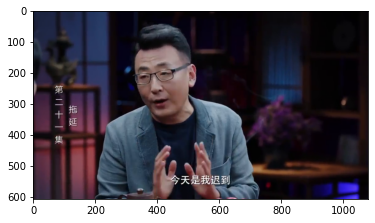

results: 0
infer results: 窦文涛
[0, 4.64]


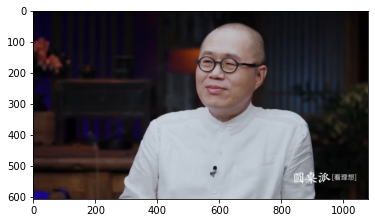

results: 1
infer results: 梁文道
[4.68, 5.24]


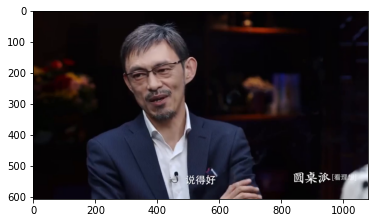

results: 2
infer results: 马家辉
[5.28, 6.04]


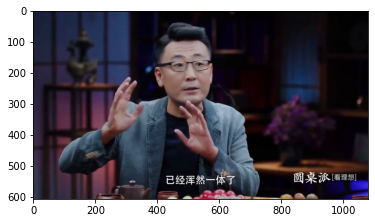

results: 0
infer results: 窦文涛
[6.08, 13.88]


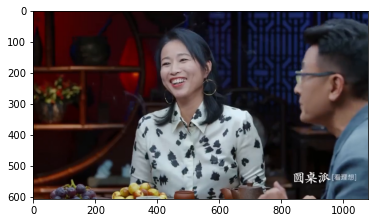

results: 3
infer results: 周轶君
[13.92, 14.92]


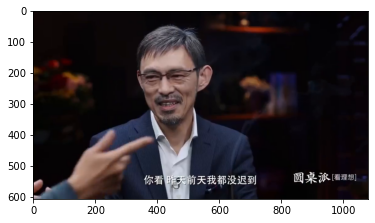

results: 2
infer results: 马家辉
[14.96, 15.52]


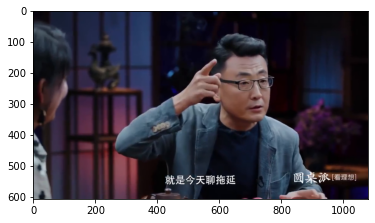

results: 0
infer results: 窦文涛
[15.56, 21.12]


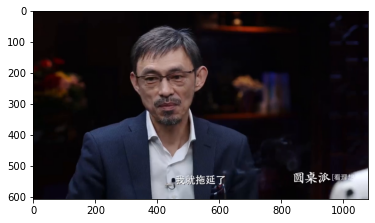

results: 2
infer results: 马家辉
[21.16, 21.96]


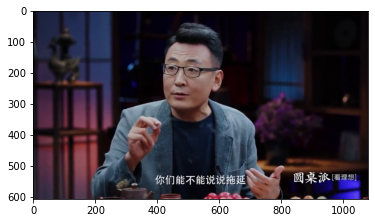

results: 0
infer results: 窦文涛
[22.0, 52.52]


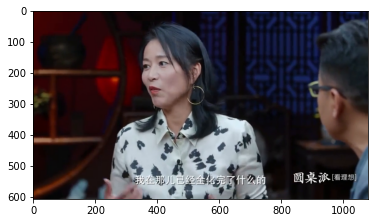

results: 3
infer results: 周轶君
[52.56, 70.16]


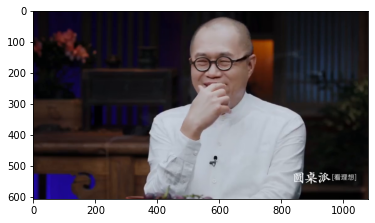

results: 1
infer results: 梁文道
[70.2, 71.08]


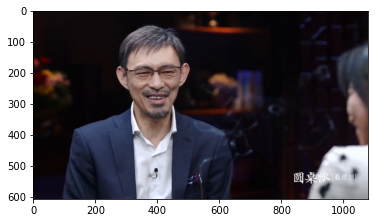

results: 2
infer results: 马家辉
[71.12, 71.96]


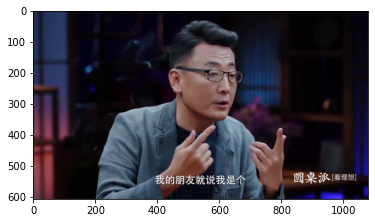

results: 0
infer results: 窦文涛
[72.0, 104.2]


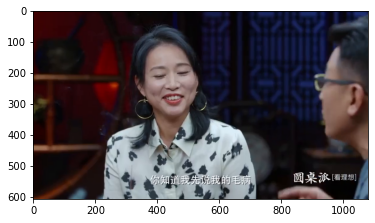

results: 3
infer results: 周轶君
[104.24, 105.32]


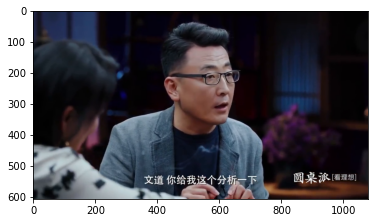

results: 0
infer results: 窦文涛
[105.36, 115.2]
['窦文涛', '梁文道', '马家辉', '窦文涛', '周轶君', '马家辉', '窦文涛', '马家辉', '窦文涛', '周轶君', '梁文道', '马家辉', '窦文涛', '周轶君', '窦文涛']


In [10]:
#fluid.scope_guard修改全局/默认作用域（scope）, 运行时中的所有变量都将分配给新的scope
with fluid.scope_guard(inference_scope):
     #获取训练好的模型
    #从指定目录中加载 推理model(inference model)
    [inference_program,# 预测用的program
     feed_target_names,# 是一个str列表，它包含需要在推理 Program 中提供数据的变量的名称。
     fetch_targets] = fluid.io.load_inference_model(params_dirname, infer_exe)#fetch_targets：是一个 Variable 列表，从中我们可以得到推断结果。
    
#     image_and_path = infer_path[0]
#     plt.imshow(image_and_path[0])   #根据数组绘制图像
#     plt.show()        #显示图像
    # 训练数据的标签
    label_list = ["窦文涛", "梁文道", "马家辉", "周轶君"]
    # 开始预测
    face_list = []
    for i in range(pic_num):
        image_and_path = infer_path[i]
        plt.imshow(image_and_path[0])   #根据数组绘制图像
        plt.show()        #显示图像
        results = infer_exe.run(
            inference_program,                      #运行预测程序
            feed={feed_target_names[0]: np.array([infer_path[i][1]])},#喂入要预测的数据
            fetch_list=fetch_targets)               #得到推测结果
        print('results:',np.argmax(results[0]))
        #print(results)
        print("infer results: %s" % label_list[np.argmax(results[0])])
        print(success[i])
        face_list.append(label_list[np.argmax(results[0])])          #将出现的的人物名字提取到face_list
    print(face_list)

    

In [13]:
audio_t = [[0,4.14],[4.15,5.14],[5.05,5.21],[5.22,10.24],[11.01,11.09],[11.15,13.20],[13.21,14.15],[14.22,21.01],[21.10,21.22],[21.23,52.20],[52.21,72.02],[70.03,71.21],[71.22,115.02]]
audio_p = ['窦文涛','梁文道','马家辉','窦文涛','梁文道','窦文涛','周轶君','窦文涛','马家辉','窦文涛','周轶君','梁文道','窦文涛']

### 时间转换方便接下来进行字幕的生成

In [14]:
def time_tranfer(time):
    sec = int(time)
    dot = int((time - sec) * 1000)
    min = int(sec/ 60)
    sec = sec % 60
    hour = int(min/60)
    min = min % 60
    return hour, min, sec, dot

In [17]:
with open('srt//demo.srt','w') as foo:
    for i in range(pic_num):
        start_time = success[i][0]
        end_time = success[i][1]
        (hour1,min1,sec1,dot1) = time_tranfer(start_time)           # 人脸识别的结果
        (hour2,min2,sec2,dot2) = time_tranfer(end_time)
        foo.write(str((i + 1)) + "\n")
        foo.write("{:0>2}".format(hour1) + ":" + "{:0>2}".format(min1) + ":" + 
                 "{:0>2}".format(sec1) + "," + "{:0>3}".format(dot1) + " --> ")
        foo.write("{:0>2}".format(hour2) + ":" + "{:0>2}".format(min2) + ":" + 
                 "{:0>2}".format(sec2) + "," + "{:0>3}".format(dot2) + "\n")
        foo.write("{\\fn微软雅黑\\fs18}嘉宾名字:%s" % face_list[i] + "\n{\\an8}\n")
        
    foo.close()

In [15]:
with open('srt//demo1.srt','w') as foo:
    for i in range(len(audio_t)):
        start_time = audio_t[i][0]
        end_time = audio_t[i][1]
        (hour1,min1,sec1,dot1) = time_tranfer(start_time)     # 人脸识别的结果
        (hour2,min2,sec2,dot2) = time_tranfer(end_time)
        foo.write(str(i + 1) + "\n")
        foo.write("{:0>2}".format(hour1) + ":" + "{:0>2}".format(min1) + ":" + 
                 "{:0>2}".format(sec1) + "," + "{:0>3}".format(dot1) + " --> ")
        foo.write("{:0>2}".format(hour2) + ":" + "{:0>2}".format(min2) + ":" + 
                 "{:0>2}".format(sec2) + "," + "{:0>3}".format(dot2) + "\n")
        foo.write("{\\fn微软雅黑\\fs12}说话的是:%s" % audio_p[i] + "\n{\\an8}\n")
        
    foo.close()